In [118]:
import pandas as pd
import numpy as np
import csv
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.animation as animation
from time import sleep
import pycountry
import plotly.express as px

In [119]:
# step 1 get the date using url here.
# using - https://ourworldindata.org/coronavirus-source-data as data source.
# Pulling down new deaths and total deaths per country.

url_new_deaths ="https://covid.ourworldindata.org/data/ecdc/new_deaths.csv"
new_deaths=pd.read_csv(url_new_deaths)

url_total_deaths ="https://covid.ourworldindata.org/data/ecdc/total_deaths.csv"
total_deaths=pd.read_csv(url_total_deaths)


In [120]:
#list(new_deaths.columns.values) 
#list(total_deaths.columns.values) 


In [121]:
new_deaths.head(5)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [122]:
total_deaths.head(5)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [123]:
# step 2 filters to world data. 
# for plotting, I only want the date and no of deaths in one country. 

total_deaths_world = total_deaths[['date','World']]
total_deaths_world.head(5)

#new_deaths_world = new_deaths[['date','World']]
#new_deaths_world.head(5)

,date,World
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


In [124]:
new_deaths_world = new_deaths[['date','World']]
new_deaths_world.head(5)

,date,World
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


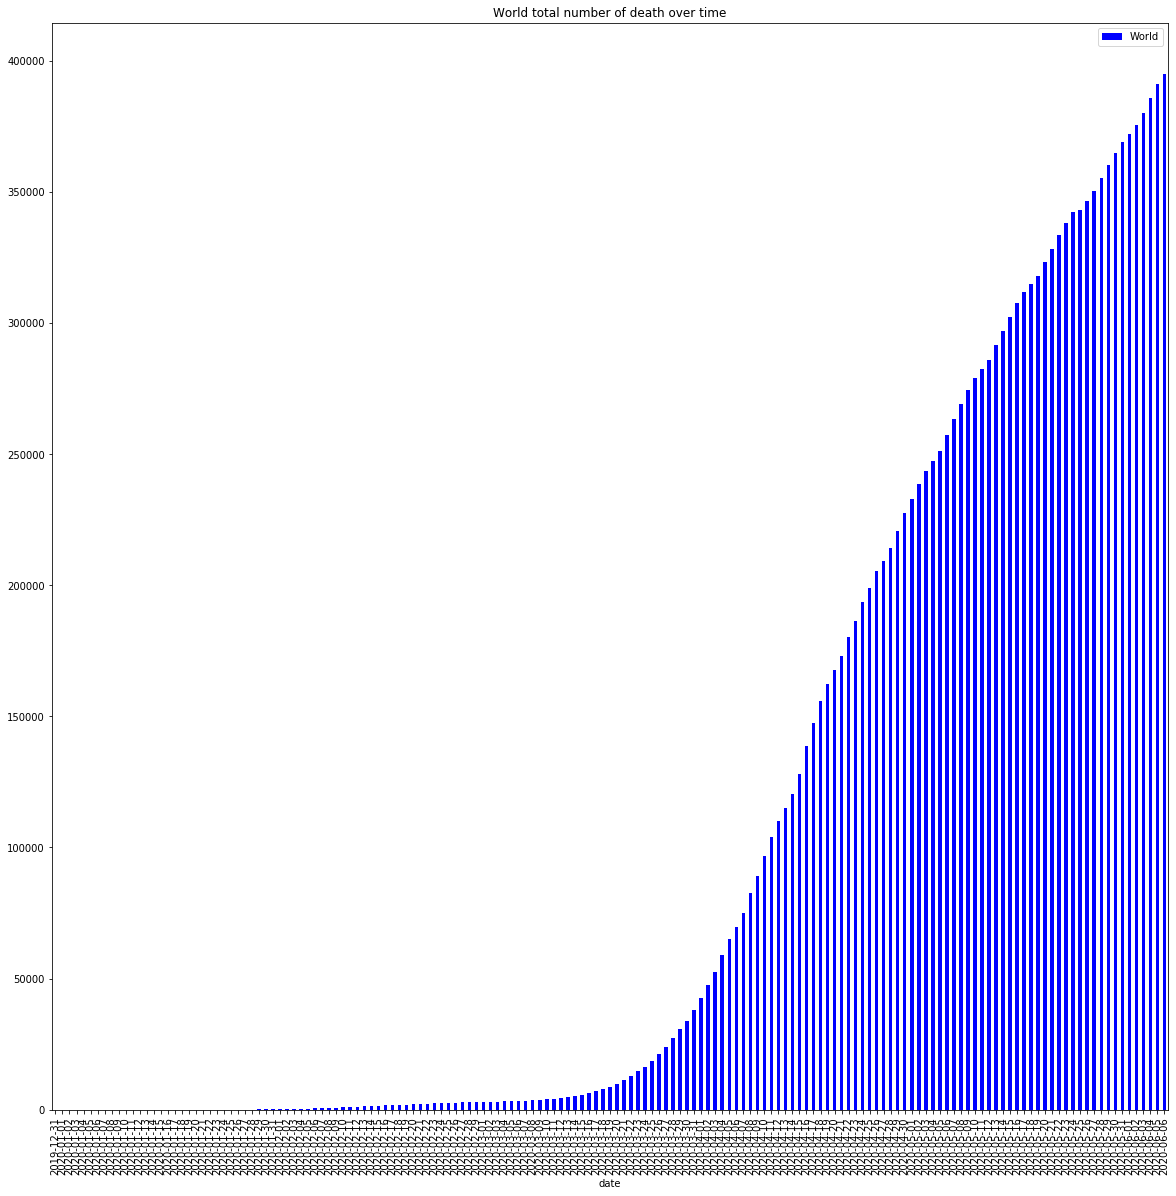

In [125]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
total_deaths_world.plot(kind = 'bar', title= "World total number of death over time", x = 'date', y = 'World', color = 'blue', ax = ax1)
plt.show()

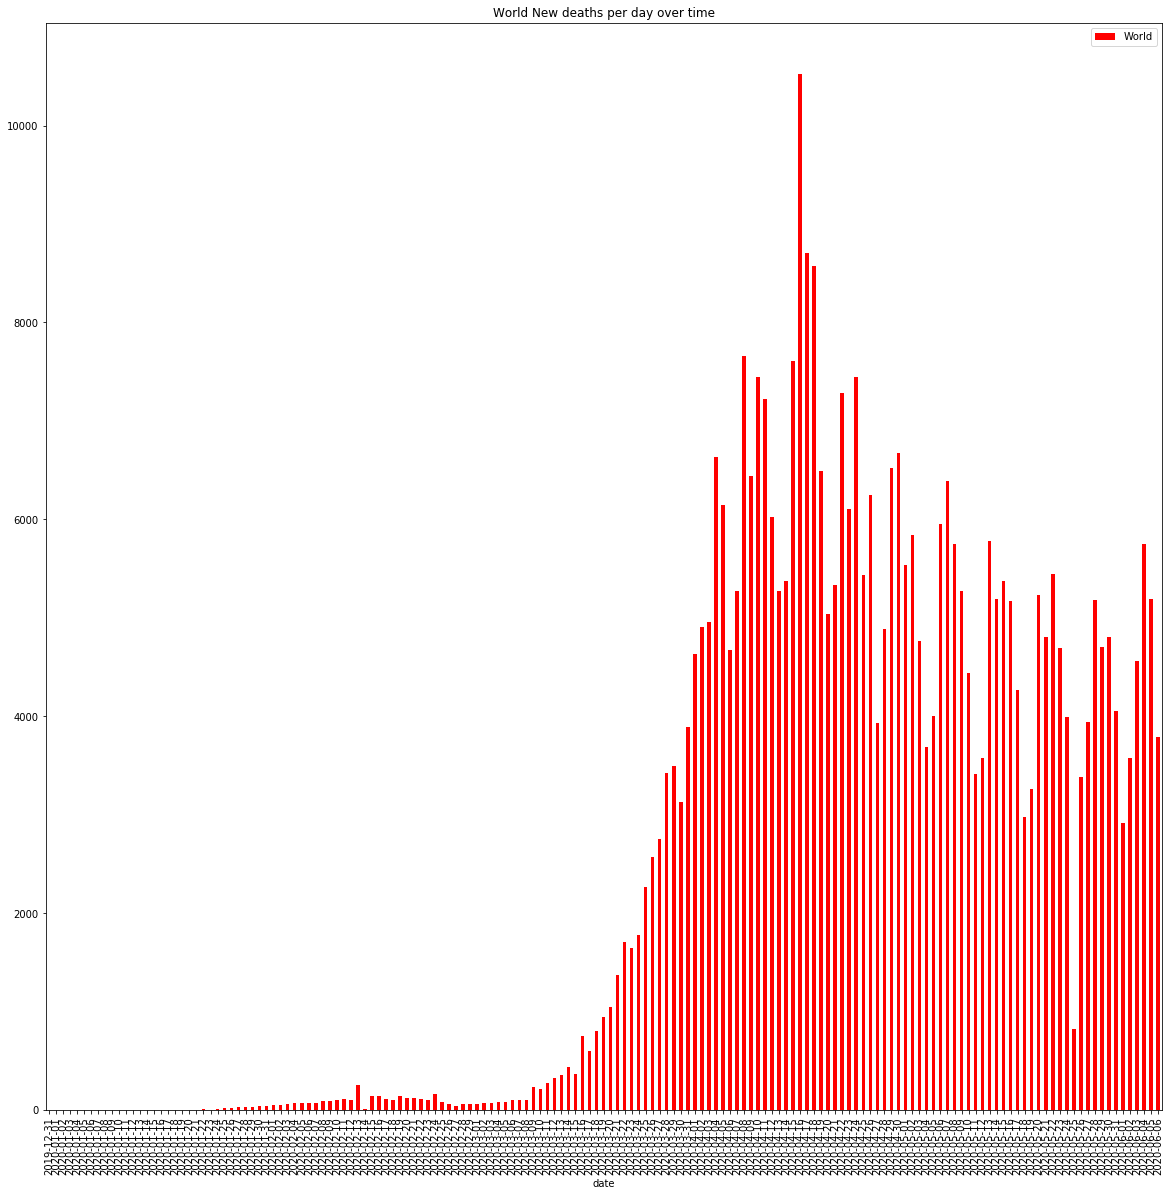

In [126]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
new_deaths_world.plot(kind = 'bar', title= "World New deaths per day over time", x = 'date', y = 'World', color = 'red', ax = ax1)
plt.show()

# xlab= 'date', ylab = 'New deaths per day',

In [127]:
# plotting ireland's data

new_deaths_ireland = new_deaths[['date','Ireland']]
new_deaths_ireland.head(5)
total_deaths_ireland = new_deaths[['date','Ireland']]
total_deaths_ireland.head(5)

,date,Ireland
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


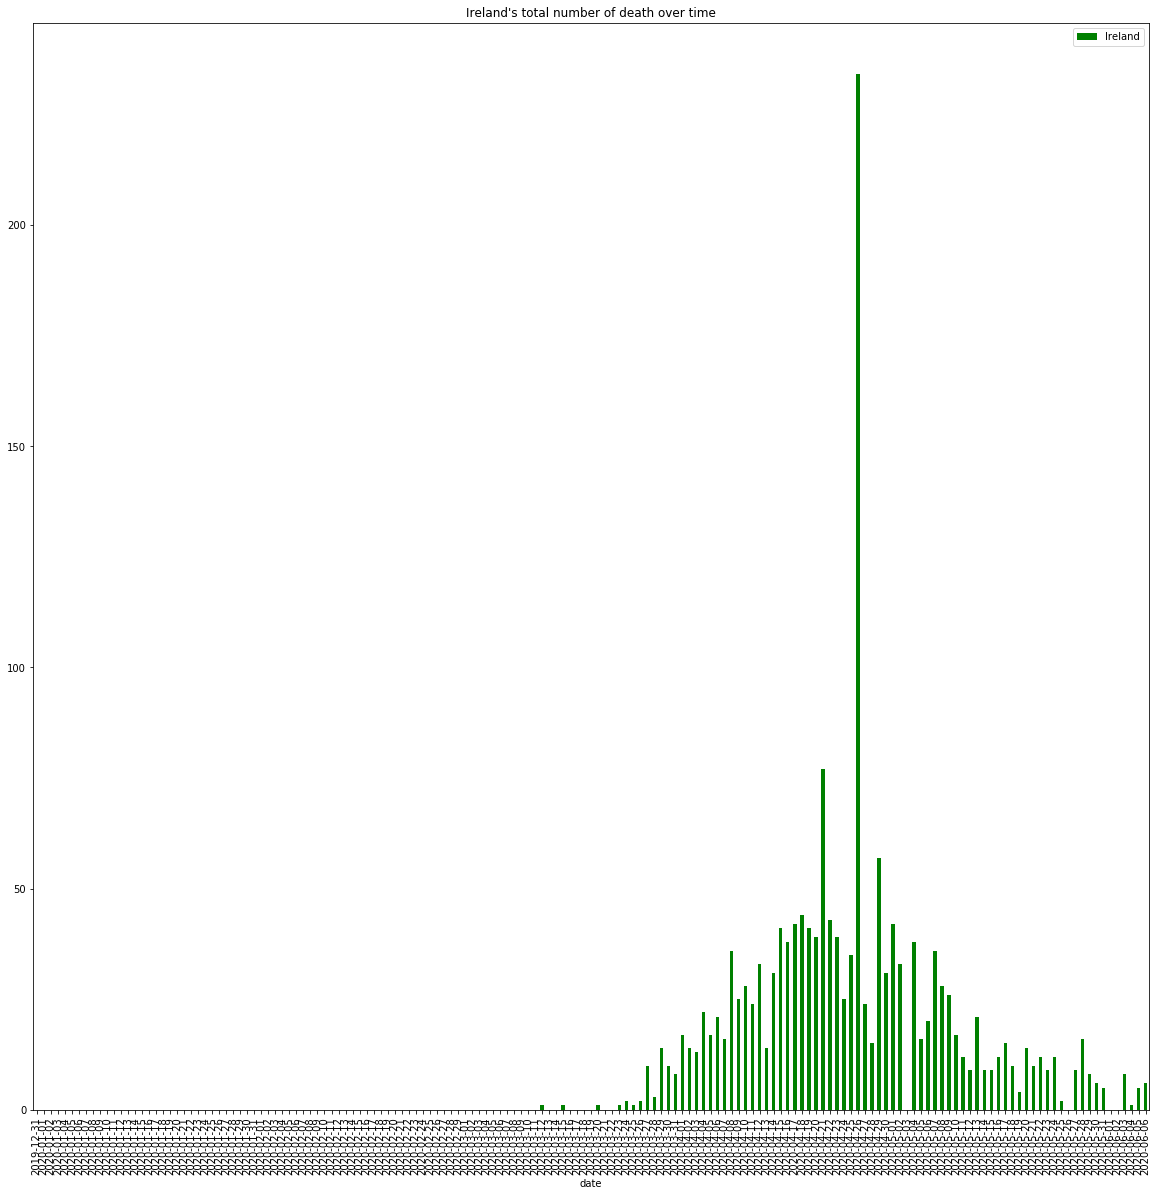

In [128]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
total_deaths_ireland.plot(kind = 'bar', title= "Ireland's total number of death over time", x = 'date', y = 'Ireland', color = 'green', ax = ax1)
plt.show()

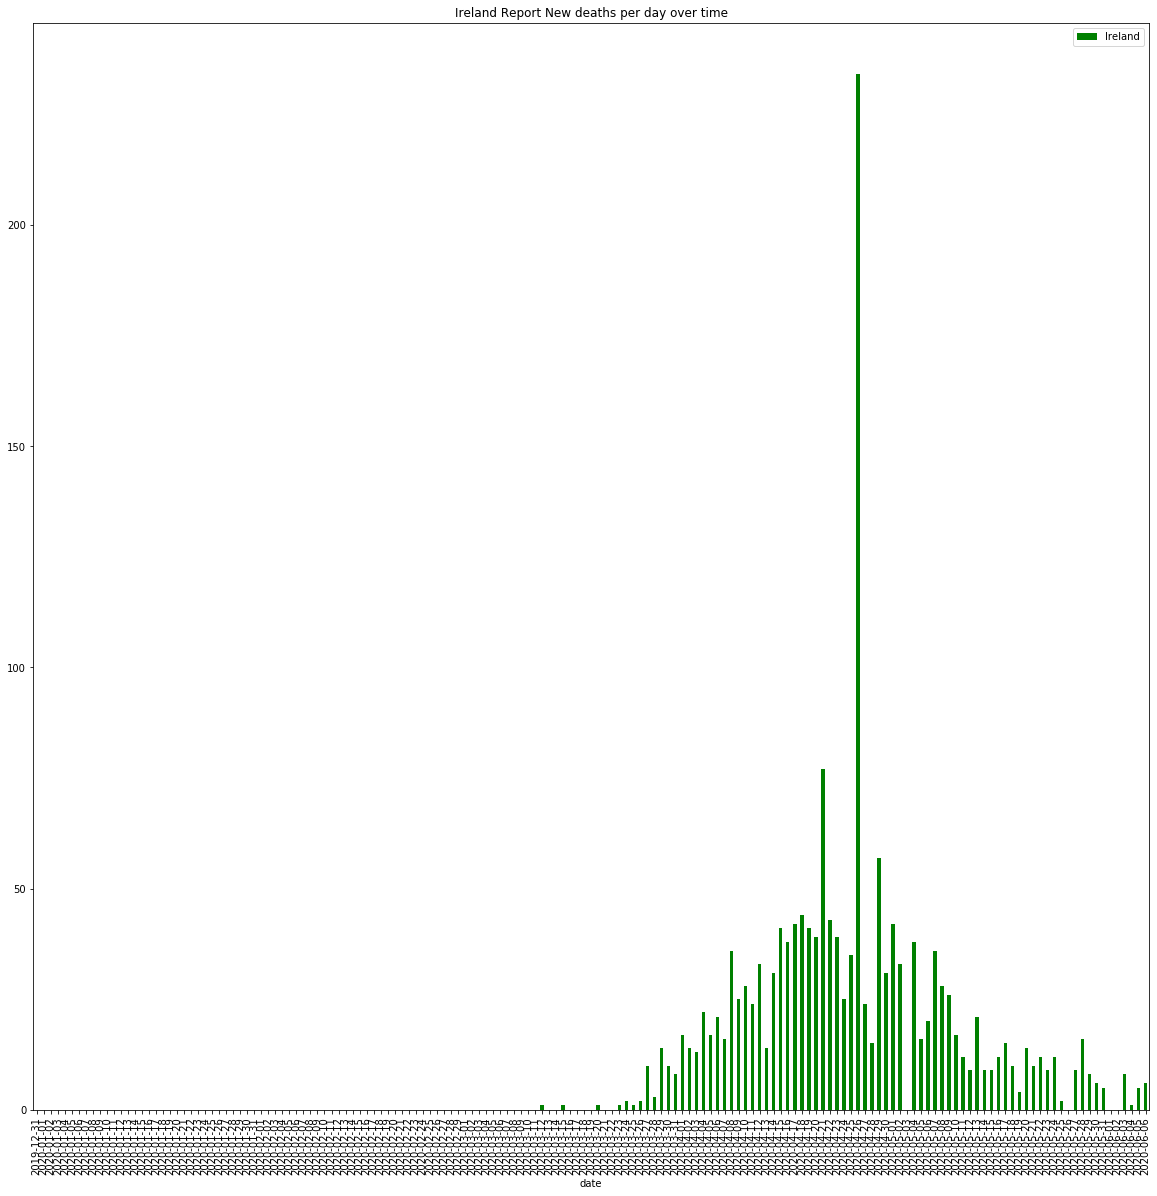

In [129]:
#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"]=20,20 # make plaot larger
ax1 = plt.gca()
new_deaths_ireland.plot(kind = 'bar', title= "Ireland Report New deaths per day over time", x = 'date', y = 'Ireland', color = 'green', ax = ax1)
plt.show()

# xlab= 'date', ylab = 'New deaths per day',

In [130]:
# From the 4 graphs above, Ireland is after its peak, but the world has yet to reach its peak. 
# Note date axis on all 4 graphs.. needs work. 

In [143]:
# I'd like a world map. downloaded hte full data from  locally. # https://ourworldindata.org/coronavirus-source-data
covid= pd.read_csv('owid-covid-data.csv')
# this includes iso_codes which is handy.

In [144]:
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [159]:
covid = covid[covid.iso_code != 'OWID_WRL']

list_countries = covid['iso_code'].unique().tolist()

list_countries = [x for x in list_countries if x == x] # removing nan entries.
print(list_countries) # Uncomment to see list of countries

# removing 'OWID_WRL' - as the world data will swamp the rest of the graph. 
#list_countries.remove('OWID_WRL')
print(list_countries)

grouped_covid = covid.groupby("iso_code")
maximums = grouped_covid.max()
print(maximums)
print(maximums["total_cases"])



plt.rcParams["figure.figsize"]=20,20  # Increase size of graph

x= maximums["total_cases"]
y= list_countries

covid.plot(kind = 'bar', x ='date' , y = list_countries, color = 'blue')

#ax1 = plt.gca()
#df_india.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = ax1)
plt.show()





#fig = px.scatter( x="Total_Cases", y, title="Scater plot of total cases per Country")
#fig.show()



['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 

KeyError: "None of [Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',\n       ...\n       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],\n      dtype='object', length=210)] are in the [columns]"

In [ ]:
# from above.. I want to tidy up the date some how..  
list_dates = total_deaths['date'].unique()
print(list_dates)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
# We will animate for these 5 countries only
list_countries = ['Ireland', 'China', 'US', 'Italy', 'Spain']
# colors for the 5 horizontal bars
list_colors = [ 'green', 'red', 'blue', 'black','yellow']
new_deaths_world = new_deaths[['date','World']]
new_deaths_world.head(5)
new_deaths_world = new_deaths[['date','World']]
new_deaths_world.head(5)

import pandas as pd
import plotly.express as px
 
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
 
us_data = us_data.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()


covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv')
grouped = covid_data.groupby('Last Update')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

In [ ]:
coviddata.head()

In [ ]:
coviddata.info
#coviddata.shape

In [ ]:
# been a bit too greedy with the data...far too much. 
# cutting it down to ireland only for now. 
# Filter for just the data on ireland
coviddata_ire = coviddata[coviddata.location.eq('Ireland')]

In [ ]:
# Filter for just the data on ireland
coviddata_ire = coviddata[coviddata.location.eq('Ireland')]
coviddata_chn = coviddata[coviddata.location.eq('China')]
coviddata_uk = coviddata[coviddata.location.eq('United Kingdom')]
coviddata_us = coviddata[coviddata.location.eq('United States')]
coviddata_italy = coviddata[coviddata.location.eq('Italy')]
coviddata_nz = coviddata[coviddata.location.eq('New Zealand')]
coviddata_ire.info


In [ ]:
#coviddata_ire[date] = coviddata_ire[date]
months = mdates.MonthLocator()  # every month

In [ ]:
print(coviddata_ire['date'])
coviddata_ire['date'] = datetime.strptime((coviddata_ire['date']), '%m-%d').date()
print(type(date_object))

In [ ]:
coviddata_ire.dtypes

In [ ]:
date_axis = pd.Series(coviddata['date'].values, index=coviddata['date'])
y_values_new_deaths = pd.Series(coviddata['new_deaths'].values)# , index=coviddata['new_deaths'])

In [ ]:
print(date_axis)
print(y_values_new_deaths)


In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
coviddata_ire.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
coviddata_ire.plot(kind='bar', ax=ax)
ax.bar(coviddata_ire.index, coviddata_ire['total_deaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))




In [ ]:
## PLot of total deaths per country.

#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m')) #('%b %d')
  
# giving a title to my graph 
plt.title('Date verses total Deaths Ireland') 
  
# function to show the plot 
plt.show() 



In [ ]:
## PLot of total deaths per country.

#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
  
# giving a title to my graph 
plt.title('Date verses total Deaths Ireland') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Italy') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths United Kingdom') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths United States') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths New Zealand') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.total_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths China') 
  
# function to show the plot 
plt.show() 

In [ ]:
# populations differ so, Charing total deaths per million in all six countries.
#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Ireland') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Italy') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million United Kingdom') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million United States') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million New Zealand') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million China') 
  
# function to show the plot 
plt.show() 

In [ ]:
# China has little or no new deaths, and also the sheer size and population of china, make the graph above look wrong.  

In [ ]:
# Charting New deaths in all six countries.
#x axis values 
x = coviddata_ire.date 
# corresponding y axis values 
y = coviddata_ire.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths Ireland') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_italy.date 
# corresponding y axis values 
y = coviddata_italy.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths Italy') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths United Kingdom') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_us.date 
# corresponding y axis values 
y = coviddata_us.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths United States') 
  
# function to show the plot 
plt.show() 

#x axis values 
x = coviddata_nz.date 
# corresponding y axis values 
y = coviddata_nz.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths New Zealand') 
  
# function to show the plot 
plt.show() 


#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses new_deaths China') 
  
# function to show the plot 
plt.show() 

In [ ]:
# from about date is an object. going to try to tidy up x-axis.

In [ ]:
# Checking 2 countries for outliers, China and ireland. - 
# In china, a number of deaths were reported after the main outbreak. see the spike in china's graph above. 
sns.boxplot(x=coviddata_chn['new_deaths'])

In [ ]:
# In ireland there was a day where they added in a number of deaths in nursing homes, which were not initally included. These
# should be included in totals, and are reponsible for the spike seen in ireland's graph above
sns.boxplot(x=coviddata_ire['new_deaths'])

In [ ]:
# group by iso_code and get maximum in each country.
# coviddatabygroup = coviddata.groupby("iso_code")
# maximums = coviddatabygroup.max()
# maximums

Q1 = coviddata.quantile(0.25)
Q3 = coviddata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
### Lets see if Ireland faired better than the rest of the world combinded
#x axis values 
x = coviddata_uk.date 
# corresponding y axis values 
y = coviddata_uk.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million UK') 
  
# function to show the plot 
plt.show() 

In [ ]:
### Lets see if Ireland faired better than the rest of the world combinded
#x axis values 
x = coviddata_chn.date 
# corresponding y axis values 
y = coviddata_chn.total_deaths_per_million
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Ireland') 
  
# function to show the plot 
plt.show() 

In [ ]:
# Group by country, sum to get totals, and then sort to find the countries with highest number of deaths. 
coviddata_grouped=coviddata.groupby("location")
sum = coviddata_grouped.sum()
totals =sum.sort_values(by=['total_deaths'], ascending=False)
# maximums = maximums.reset_index()
totals

In [ ]:
top5=totals.head(6) # Note all top 5 are developed countries, so lets say people had access to healthcare. 
top5=top5.filter(['location', 'total_cases_per_million'])
top5

In [ ]:
# Plot of the Top 5 Countries and Deaths per million of population. World is also included, and is much lower, either
# either large part of the world not affect or not reported. 
my_plot = top5.plot(kind='bar')
# naming the x-axis 
plt.xlabel('Country') 
# naming the y-axis 
plt.ylabel('Deaths Per Million') 
# plot title 
plt.title('Bar chart of Top Five Countries and Death per million - and the world') 

In [ ]:
# Plot bar chart, of new deaths by date in Ireland 
#my_plot = coviddata_ire.plot(kind='bar')
# naming the x-axis 
#plt.xlabel('Country') 
# naming the y-axis 
plt.ylabel('New Deaths ') 
# plot title 
plt.title('Bar chart of Top Five Countries and Death per million - and the world') 


# populations differ so, Charing total deaths per million in all six countries.
#x axis values 
x = coviddata_ire.date 
# corresponding y axis values. 
y = coviddata_ire.new_deaths
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Date verses total Deaths Per Million Ireland') 
  
# function to show the plot 
plt.show() 

In [ ]:
coviddata.to_csv('output.csv', index = False)

In [ ]:
#### ----- Step 2 (Select data for Ireland)----
data_ireland = coviddata[coviddata['iso_code'] == 'IRL']
print(data_ireland.head(3))

In [ ]:
#### ----- Step 3 (Plot data)----
# Increase size of plot
plt.rcParams["figure.figsize"]=20,20  # Remove if not on Jupyter
# Plot column 'Confirmed'
data_ireland.plot(kind = 'bar', x = 'date', y = 'new_deaths', color = 'blue')

ax1 = plt.gca()
data_ireland.plot(kind = 'bar', x = 'date', y = 'new_deaths', color = 'red', ax = ax1)
plt.show()

In [ ]:
# https://www.kaggle.com/nhntran/covid-19-the-world-data-eda-and-visualization